# 2.1 - Data Cleaning

## Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import seaborn as sns

We can refer to the Pandas module using the "dot notation" to call its methods. To read our data (which is in the form of csv files), into a so-called DataFrame structure, we use the method read_csv() and pass in each file name as a string: All the datasets are loaded and storeed in pandas dataframe objects.

In [2]:
%%time
info_content_raw_df = pd.read_csv('../data/raw/Info_Content.csv', index_col='ucid')
info_userdata_raw_df = pd.read_csv('../data/raw/Info_UserData.csv', index_col='uuid')
log_problem_raw_df = pd.read_csv('../data/raw/Log_Problem.csv', index_col='upid')

Wall time: 39.4 s


In [3]:
# scale down some records
log_problem_raw_df = log_problem_raw_df[log_problem_raw_df['timestamp_TW'] < '2019-01-01']

In [4]:
log_problem_raw_df.shape

(7197409, 13)

## Drop Unused Columns

In [5]:
selected_columns = ['content_pretty_name','difficulty','learning_stage']

In [6]:
info_content_df = info_content_raw_df[selected_columns].copy()

In [7]:
info_content_df.head()

,content_pretty_name,difficulty,learning_stage
ucid,,,
odIwFdIiecFwVUAEEV40K3MSuCSlIZkbq92Zp9tkZq8=,【基礎】怎樣解題：數量關係,easy,elementary
dfeeBaa8zDhWS6nu7zeXKwLyi4zqEajI3tJM9/fSBPM=,【基礎】和差問題 1,easy,elementary
C2AT0OBTUn+PRxEVd39enhW/DJtka1Tk90DUAR6yVdA=,【基礎】雞兔問題 1,easy,elementary
jZvYpEa6VB/WrlKKmQHnfbv/xJ4OypBzq0epVcn500Q=,【基礎】年齡問題 1,easy,elementary
M+UxJPgRIW57a0YS3eik8A9YDj+AwaMpTa5yWYn/kAw=,【基礎】追趕問題,easy,elementary


In [8]:
info_userdata_df = info_userdata_raw_df.copy()

In [9]:
info_userdata_df.head()

,gender,points,badges_cnt,first_login_date_TW,user_grade,user_city,has_teacher_cnt,is_self_coach,has_student_cnt,belongs_to_class_cnt,has_class_cnt
uuid,,,,,,,,,,,
Y2RcCdmUJAYPUAIDElo4nE9KrkLLFzUIRdexG+ipaZQ=,NaN,18300,1,2019-01-24,1,kh,0,False,0,0,0
lw/Rchfvl9q1UDaQRmeE6QJDJeXAK7nt56RvUvqxD/8=,NaN,6468,0,2019-01-24,1,ntpc,1,False,0,1,0
ncVYyCw3osV77X9M+4NbI7LvBR5UiB4ix6Ca+baQArA=,male,4703,0,2019-01-24,1,tp,0,False,0,0,0
J7Tbo1x2WtRpPuXeX7lWT9tkzWlSJeubl8UWjNmHh+4=,NaN,15525,1,2019-01-24,2,ntpc,0,False,0,0,0
qijKzROzz1LmCaCxHJ3mOBOtjW/q4kW80tnpPmXHVYQ=,NaN,7945,0,2019-01-24,2,km,1,False,0,1,0


In [10]:
selected_columns = ['gender','points','badges_cnt','first_login_date_TW','user_grade','user_city','has_teacher_cnt','is_self_coach','has_student_cnt','belongs_to_class_cnt','has_class_cnt']

In [11]:
log_problem_df = log_problem_raw_df.copy()

In [12]:
log_problem_df.head()

,timestamp_TW,uuid,ucid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level
upid,,,,,,,,,,,,,
ZmKEZ0F2WFqhlL7KFfJcHEnZCZu0e4p+CVG5rSlyKYk=,2018-09-28 20:00:00 UTC,Kpq2q+eKw/O+6/jLs3XJosgmI7weEJxJZdnkKTbbF8I=,Ps4dfShfpeMF3VG030HqZ2bsbD7PaVxvJYFTtroeSzQ=,2,1,True,11,1,0,False,NaN,NaN,0
tO9dyvadKWMVQgEx/BXtRIYJ2TRJFQgwvcsBwFb4+xI=,2018-09-28 10:15:00 UTC,0+VU/Zb0Q96uoByuRhl7r9bJuJO6CKWpsmNMEuijSzc=,/d39FzqaM3PZzpoMXxA80PMICsVhzfL6MGSCqZtsQOo=,6,1,True,26,1,0,False,NaN,NaN,0
6Lxz6aXvgyw3vZd3v8g6jgoCRDPOQzVPx/dnEC0o7DQ=,2018-09-05 20:00:00 UTC,g8DnYvIqpolw10XlwWeIWv6NbDPByUbmgH8EshJqBns=,YuGOmB+frbM8rfAa0RJE882R+IoMf9N89OiVqLbAHBw=,4,1,True,78,1,0,False,NaN,NaN,0
1fIjdakTApQp5PfWog87uOmM6JuoNE/oQq2y5/fMmfw=,2018-09-14 16:30:00 UTC,kSyUTFlepsYUD723IPL/jEZ520xaKbscrBmNtBUFR1o=,BG1RsWojzEHzV28RBm/1iKi1NyZgDcDomLYEJSV6lmo=,3,1,True,7,1,0,False,NaN,NaN,0
8V/NT6M+er2I3V3ZIWRNo4Qbo3Iad89PHbeeZeoZeF0=,2018-09-13 16:00:00 UTC,XMFbFA7C49+LRhUddhelfPpA6F5dbOoxeyL3eYbuTlY=,qPHR8aBqOhKij9IS/Y8IR8prwWruoDBGU1tVUhXDJkE=,12,1,True,48,1,0,False,False,True,1


## Handling Missing Values

The first thing to do when you get a new dataset is take a look at some of it. This lets you see that it all read in correctly and gives an idea of what's going on with the data. In this case, let's see if there are any missing values, which will be reprsented with NaN or None.

In [13]:
# get the number of missing data points per column
missing_values_count = info_content_df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count

content_pretty_name    0
difficulty             0
learning_stage         0
dtype: int64

In [14]:
# how many total missing values do we have?
total_cells = np.product(info_content_df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.0


In [15]:
# get the number of missing data points per column
missing_values_count = info_userdata_df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count

gender                  39853
points                      0
badges_cnt                  0
first_login_date_TW         0
user_grade                  0
user_city                   0
has_teacher_cnt             0
is_self_coach               0
has_student_cnt             0
belongs_to_class_cnt        0
has_class_cnt               0
dtype: int64

In [16]:
# how many total missing values do we have?
total_cells = np.product(info_userdata_df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

4.979521152313147


In [17]:
# replace all NA's with unspecified
info_userdata_df = info_userdata_df.fillna('unspecified')

In [18]:
# get the number of missing data points per column
missing_values_count = log_problem_df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count

timestamp_TW                             0
uuid                                     0
ucid                                     0
problem_number                           0
exercise_problem_repeat_session          0
is_correct                               0
total_sec_taken                          0
total_attempt_cnt                        0
used_hint_cnt                            0
is_hint_used                             0
is_downgrade                       6365746
is_upgrade                         6365746
level                                    0
dtype: int64

In [19]:
# how many total missing values do we have?
total_cells = np.product(log_problem_df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

13.60691796814018


In [20]:
# replace all NA's with false
log_problem_df = log_problem_df.fillna(False)

## Parsing Date

Now that we know that our date column isn't being recognized as a date, it's time to convert it so that it is recognized as a date. This is called "parsing dates" because we're taking in a string and identifying its component parts.

In [21]:
info_userdata_df['first_login_date_TW'].head()

uuid
Y2RcCdmUJAYPUAIDElo4nE9KrkLLFzUIRdexG+ipaZQ=    2019-01-24
lw/Rchfvl9q1UDaQRmeE6QJDJeXAK7nt56RvUvqxD/8=    2019-01-24
ncVYyCw3osV77X9M+4NbI7LvBR5UiB4ix6Ca+baQArA=    2019-01-24
J7Tbo1x2WtRpPuXeX7lWT9tkzWlSJeubl8UWjNmHh+4=    2019-01-24
qijKzROzz1LmCaCxHJ3mOBOtjW/q4kW80tnpPmXHVYQ=    2019-01-24
Name: first_login_date_TW, dtype: object

In [22]:
log_problem_df['timestamp_TW'].head()

upid
ZmKEZ0F2WFqhlL7KFfJcHEnZCZu0e4p+CVG5rSlyKYk=    2018-09-28 20:00:00 UTC
tO9dyvadKWMVQgEx/BXtRIYJ2TRJFQgwvcsBwFb4+xI=    2018-09-28 10:15:00 UTC
6Lxz6aXvgyw3vZd3v8g6jgoCRDPOQzVPx/dnEC0o7DQ=    2018-09-05 20:00:00 UTC
1fIjdakTApQp5PfWog87uOmM6JuoNE/oQq2y5/fMmfw=    2018-09-14 16:30:00 UTC
8V/NT6M+er2I3V3ZIWRNo4Qbo3Iad89PHbeeZeoZeF0=    2018-09-13 16:00:00 UTC
Name: timestamp_TW, dtype: object

### Convert our date columns to datetime

We can pandas what the format of our dates are with a guide called as "strftime directive", which you can find more information on at this link. The basic idea is that you need to point out which parts of the date are where and what punctuation is between them. There are lots of possible parts of a date, but the most common are %d for day, %m for month, %y for a two-digit year and %Y for a four digit year.

In [23]:
info_userdata_df['first_login_date_TW'] = pd.to_datetime(info_userdata_df['first_login_date_TW'], format='%Y-%m-%d')
info_userdata_df = info_userdata_df.rename(columns = {'first_login_date_TW':'date_login'})

In [24]:
log_problem_df['timestamp_TW'] = pd.to_datetime(log_problem_df['timestamp_TW'], format='%Y-%m-%d %H:%M:%S %Z')
log_problem_df = log_problem_df.rename(columns = {'timestamp_TW':'datetime_attempt'})

Now when I check the first few rows of the new column, I can see that the dtype is `datetime64`. I can also see that my dates have been slightly rearranged so that they fit the default order datetime objects (year-month-day).

In [25]:
# print the first few rows
info_userdata_df['date_login'].head()

uuid
Y2RcCdmUJAYPUAIDElo4nE9KrkLLFzUIRdexG+ipaZQ=   2019-01-24
lw/Rchfvl9q1UDaQRmeE6QJDJeXAK7nt56RvUvqxD/8=   2019-01-24
ncVYyCw3osV77X9M+4NbI7LvBR5UiB4ix6Ca+baQArA=   2019-01-24
J7Tbo1x2WtRpPuXeX7lWT9tkzWlSJeubl8UWjNmHh+4=   2019-01-24
qijKzROzz1LmCaCxHJ3mOBOtjW/q4kW80tnpPmXHVYQ=   2019-01-24
Name: date_login, dtype: datetime64[ns]

In [26]:
log_problem_df['datetime_attempt'].head()

upid
ZmKEZ0F2WFqhlL7KFfJcHEnZCZu0e4p+CVG5rSlyKYk=   2018-09-28 20:00:00+00:00
tO9dyvadKWMVQgEx/BXtRIYJ2TRJFQgwvcsBwFb4+xI=   2018-09-28 10:15:00+00:00
6Lxz6aXvgyw3vZd3v8g6jgoCRDPOQzVPx/dnEC0o7DQ=   2018-09-05 20:00:00+00:00
1fIjdakTApQp5PfWog87uOmM6JuoNE/oQq2y5/fMmfw=   2018-09-14 16:30:00+00:00
8V/NT6M+er2I3V3ZIWRNo4Qbo3Iad89PHbeeZeoZeF0=   2018-09-13 16:00:00+00:00
Name: datetime_attempt, dtype: datetime64[ns, UTC]

### Select Day of Month

In [27]:
# get the day of the month from the date_parsed column
day_of_month_userdata = info_userdata_df['date_login'].dt.day
day_of_month_userdata.head()

uuid
Y2RcCdmUJAYPUAIDElo4nE9KrkLLFzUIRdexG+ipaZQ=    24
lw/Rchfvl9q1UDaQRmeE6QJDJeXAK7nt56RvUvqxD/8=    24
ncVYyCw3osV77X9M+4NbI7LvBR5UiB4ix6Ca+baQArA=    24
J7Tbo1x2WtRpPuXeX7lWT9tkzWlSJeubl8UWjNmHh+4=    24
qijKzROzz1LmCaCxHJ3mOBOtjW/q4kW80tnpPmXHVYQ=    24
Name: date_login, dtype: int64

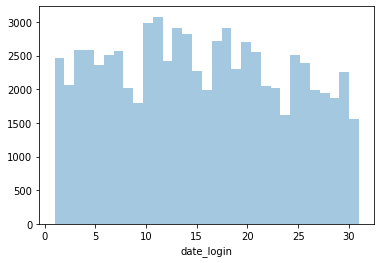

In [28]:
# remove na's
day_of_month_userdata = day_of_month_userdata.dropna()

# plot the day of the month
sns.distplot(day_of_month_userdata, kde=False, bins=31)

In [29]:
# get the day of the month from the date_parsed column
day_of_month_problem = log_problem_df['datetime_attempt'].dt.day
day_of_month_problem.head()

upid
ZmKEZ0F2WFqhlL7KFfJcHEnZCZu0e4p+CVG5rSlyKYk=    28
tO9dyvadKWMVQgEx/BXtRIYJ2TRJFQgwvcsBwFb4+xI=    28
6Lxz6aXvgyw3vZd3v8g6jgoCRDPOQzVPx/dnEC0o7DQ=     5
1fIjdakTApQp5PfWog87uOmM6JuoNE/oQq2y5/fMmfw=    14
8V/NT6M+er2I3V3ZIWRNo4Qbo3Iad89PHbeeZeoZeF0=    13
Name: datetime_attempt, dtype: int64

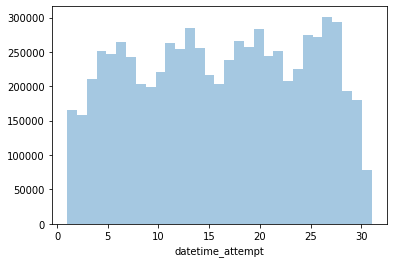

In [30]:
# remove na's
day_of_month_problem = day_of_month_problem.dropna()

# plot the day of the month
sns.distplot(day_of_month_problem, kde=False, bins=31)

Yep, it looks like we did parse our dates correctly & this graph makes good sense to me.

## Exporting Data

The data is in DataFrame form, it can manipulate it by adding a body mass index column. The cleaned data is exported to the interim data folder which stores the intermediate data that has been transformed.

In [31]:
info_content_df.to_csv('../data/interim/Info_Content.csv')
info_userdata_df.to_csv('../data/interim/Info_UserData.csv')
log_problem_df.to_csv('../data/interim/Log_Problem.csv')